In [33]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split

# Part C

To recognize faces by computing embeddings with a pretrained VGG19 model and classifying them using SVM.

Subfolders: ['pins_Aaron Paul', 'pins_alexandra daddario']


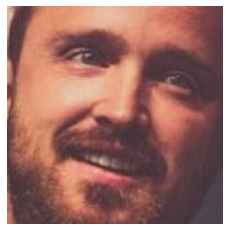

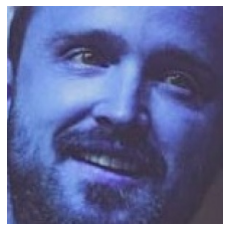

In [1]:
# Read and load data

# Path to main folder
main_folder_path = "C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS"

# Get subfolder names (b, c, d, e)
subfolders = os.listdir(main_folder_path)
print("Subfolders:", subfolders[0:2])

# Load images from each subfolder
image_data = []
image_data1 = []
image_paths = []

# we have not considered all the subfolders just for the purpose of ease of handling data. Only two folders are considered for understanding the concept.

for subfolder in subfolders[0:2]:
    subfolder_path = os.path.join(main_folder_path, subfolder)
    
    if os.path.isdir(subfolder_path):  # Check if it's a folder
        for image_name in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_name)
            image_paths.append(image_path)
            image = cv2.imread(image_path)  # Load image
            image_data1.append(image)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
            image_data.append(image)

# Display a sample image
plt.imshow(image_data[0])
plt.axis("off")
plt.show()

# Display a sample image
plt.imshow(image_data1[0])
plt.axis("off")
plt.show()


Note: Why Convert BGR to RGB?
- When using OpenCV (cv2.imread), images are loaded in BGR format by default. However, most libraries like Matplotlib (plt.imshow) and TensorFlow/Keras expect RGB format.

📌 When to Convert?
✅ If using OpenCV (cv2.imread), convert from BGR → RGB for correct color representation.
❌ If using PIL (Image.open()) or TensorFlow (ImageDataGenerator), no conversion is needed (already RGB).

In [2]:
print(len(image_data))

251


In [3]:
image_data[0].shape # first image shape

(301, 299, 3)

In [4]:
image_data[1].shape # second image shape

(299, 299, 3)

In [5]:
# Check if all the images have same no. of channels
channels = []
for i in range(0,251):
    channels.append(image_data[i].shape[-1])
print(set(channels))

{3}


In [6]:
print(image_paths[0:3])

['C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS\\pins_Aaron Paul\\Aaron Paul0_262.jpg', 'C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS\\pins_Aaron Paul\\Aaron Paul101_247.jpg', 'C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS\\pins_Aaron Paul\\Aaron Paul101_248.jpg']


In [9]:
# Extract metadata of each image
import pandas as pd
metadata = []
def extract_image_metadata(image_path):
    """Extracts metadata from an image and returns it as a dictionary."""
    image_name = os.path.basename(image_path)  # Get image name
    image_extension = os.path.splitext(image_name)[-1].lower()  # Extract file extension (e.g., .jpg, .png)
    image_size_kb = round(os.path.getsize(image_path) / 1024, 2)  # Get file size in KB

    # Read image using OpenCV
    image = cv2.imread(image_path)
    
    if image is None:
        return None  # Return None if image is not valid

    height, width, channels = image.shape  # Get image dimensions

    # Store metadata in a dictionary
    metadata.append( {
        "image_name": image_name,
        "width": width,
        "height": height,
        "channels": channels,
        "image_extension": image_extension,
        "file_size_kb": image_size_kb
    })
    
    return metadata

for i in image_paths:
    extract_image_metadata(i)

# Convert metadata to DataFrame
df = pd.DataFrame(metadata)
print(df.head())


              image_name  width  height  channels image_extension  \
0    Aaron Paul0_262.jpg    299     301         3            .jpg   
1  Aaron Paul101_247.jpg    299     299         3            .jpg   
2  Aaron Paul101_248.jpg    299     299         3            .jpg   
3  Aaron Paul101_249.jpg    299     299         3            .jpg   
4  Aaron Paul103_217.jpg    299     299         3            .jpg   

   file_size_kb  
0         22.51  
1         22.20  
2         20.85  
3         21.01  
4         15.91  


In [10]:
import scipy

In [11]:
# Generate Embeddings vectors on the each face in the dataset
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np

# Load pre-trained VGG16 model (VGG-Face architecture)
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
print("yes1!!")
#base_model.load_weights("vgg_face_weights.h5")  # Load VGG-Face pre-trained weights
print("yes2!!")

# Extract features from the last pooling layer (output = 512-D feature vector)
face_embedding_model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

print("✅ VGG-Face model loaded successfully!")


yes1!!
yes2!!
✅ VGG-Face model loaded successfully!


In [12]:
# Extract face embeddings
def extract_face_embedding(image_path):
    """Extracts a 512-D face embedding from an image using VGG-Face."""
    try:
        # Load and preprocess image
        image = load_img(image_path, target_size=(224, 224))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)  # Convert to batch format
        image = preprocess_input(image)  # Normalize pixels

        # Generate face embedding
        embedding = face_embedding_model.predict(image)[0].flatten()  # Flatten to 1D (512,)
        return embedding
    except Exception as e:
        print(f"❌ Error processing {image_path}: {e}")
        return None


In [13]:
import os
import cv2

# Folder containing face images

face_embeddings = {}  # Store embeddings as {image_name: embedding}

for path in image_paths:
    embedding = extract_face_embedding(image_path)
    if embedding is not None:
        face_embeddings[path] = embedding

print(f"✅ Extracted embeddings for {len(face_embeddings)} faces!")

1/1 [==============================] - 0s 151ms/step
✅ Extracted embeddings for 251 faces!


In [14]:
print(face_embeddings)

{'C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS\\pins_Aaron Paul\\Aaron Paul0_262.jpg': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS\\pins_Aaron Paul\\Aaron Paul101_247.jpg': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS\\pins_Aaron Paul\\Aaron Paul101_248.jpg': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS\\pins_Aaron Paul\\Aaron Paul101_249.jpg': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS\\pins_Aaron Paul\\Aaron Paul103_217.jpg': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS\\pins_Aaron Paul\\Aaron Paul113_228.jpg': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'C:\\Users\\hp\\Documents\\Great Learning_Compu

In [15]:
# Build distance metrics for identifying the distance between two similar and dissimilar images. 

In [16]:
# Compute euclidean distance
from scipy.spatial.distance import euclidean

def compute_euclidean_distance(emb1, emb2):
    return euclidean(emb1, emb2)

# Example: Compare two images
image1, image2 = "C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS\\pins_Aaron Paul\\Aaron Paul0_262.jpg", "C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS\\pins_Aaron Paul\\Aaron Paul101_247.jpg"
distance = compute_euclidean_distance(face_embeddings[image1], face_embeddings[image2])
print(f"Euclidean Distance between {image1} and {image2}: {distance}")


Euclidean Distance between C:\Users\hp\Documents\Great Learning_Computer Vision\PINS\pins_Aaron Paul\Aaron Paul0_262.jpg and C:\Users\hp\Documents\Great Learning_Computer Vision\PINS\pins_Aaron Paul\Aaron Paul101_247.jpg: 0.0


In [17]:
# Compute cosine similarity
from scipy.spatial.distance import cosine

def compute_cosine_similarity(emb1, emb2):
    return 1 - cosine(emb1, emb2)  # Cosine similarity (1 = same, 0 = different)

similarity = compute_cosine_similarity(face_embeddings[image1], face_embeddings[image2])
print(f"Cosine Similarity between {image1} and {image2}: {similarity}")


Cosine Similarity between C:\Users\hp\Documents\Great Learning_Computer Vision\PINS\pins_Aaron Paul\Aaron Paul0_262.jpg and C:\Users\hp\Documents\Great Learning_Computer Vision\PINS\pins_Aaron Paul\Aaron Paul101_247.jpg: 1.0


In [18]:
# Use PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Convert embeddings dictionary to NumPy array
image_names = list(face_embeddings.keys())  # Store image names
embeddings = np.array(list(face_embeddings.values()))  # Convert embeddings to array

# Apply PCA to reduce 512-D to 100-D
pca = PCA(n_components=100)  # Reduce to 100 dimensions
compressed_embeddings = pca.fit_transform(embeddings)

# Store reduced embeddings in a dictionary
compressed_face_embeddings = {image_names[i]: compressed_embeddings[i] for i in range(len(image_names))}

print(f"✅ PCA applied! Reduced embeddings from 512-D to 100-D.")


✅ PCA applied! Reduced embeddings from 512-D to 100-D.


In [20]:
features_list = []
labels_list = []

# Your dictionary containing image paths and corresponding feature vectors i.e "face_embeddings"

# Lists to store features and labels
features_list = []
labels = []

# Iterate through the dictionary to extract features and labels
for image_path, feature_vector in face_embeddings.items():
    # Add the feature vector to the features list
    features_list.append(feature_vector)
    
    # Extract the person's folder name (e.g., 'pins_Aaron Paul')
    person_folder = image_path.split("\\")[-2]  # Get the second-to-last part from the path
    labels_list.append(person_folder)

# Now, features_list contains the feature vectors, and labels contains the corresponding person's folder name
print("Features List:", features_list)
print("Labels:", labels)




# Convert features and labels into numpy arrays
X = np.array(features_list)
y = np.array(labels_list)

Features List: [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0.

In [21]:
# Build an SVM classifier in order to map each image to its right person
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
import pickle


# Encode labels (e.g., convert names into numerical labels)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train the SVM classifier with a linear kernel
svm_classifier = svm.SVC(kernel='linear', probability=True)
svm_classifier.fit(X, y_encoded)

# Save the trained model and label encoder to disk
with open('svm_classifier.pkl', 'wb') as model_file:
    pickle.dump(svm_classifier, model_file)

with open('label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoder, encoder_file)


In [22]:
# Function to predict a person's identity from an image
def predict_person(image_path):
    # Extract features from the input image
    features = extract_face_embedding(image_path)
    
    # Load the saved classifier and label encoder
    with open('svm_classifier.pkl', 'rb') as model_file:
        svm_classifier = pickle.load(model_file)
    
    with open('label_encoder.pkl', 'rb') as encoder_file:
        label_encoder = pickle.load(encoder_file)
    
    # Predict the label (person) and decode it
    predicted_label_encoded = svm_classifier.predict([features])[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_encoded])[0]
    
    return predicted_label


In [23]:
# Test the SVM classifier on a new image
test_image = "C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\PINS\\pins_Benedict Cumberbatch\\Benedict Cumberbatch0.jpg"
predicted_person = predict_person(test_image)
print(f'The predicted person is: {predicted_person}')

1/1 [==============================] - 0s 171ms/step
The predicted person is: pins_alexandra daddario


In [24]:
# Import and display test images

C:\Users\hp\Documents\Great Learning_Computer Vision\Benedict Cumberbatch9.jpg
Image name: Benedict Cumberbatch9.jpg
Image width: 299
Image height: 299


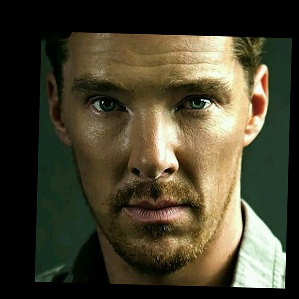

C:\Users\hp\Documents\Great Learning_Computer Vision\Dwayne Johnson4.jpg
Image name: Dwayne Johnson4.jpg
Image width: 299
Image height: 299


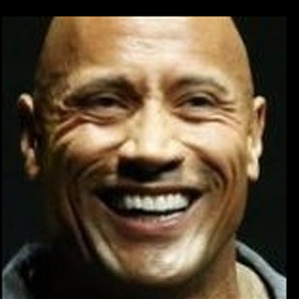

In [25]:
from PIL import Image
import os
from IPython.display import display  # Import display function

# List of image filenames
Image_names = ["Benedict Cumberbatch9.jpg", "Dwayne Johnson4.jpg"]

# Directory path containing images
path = "C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\"

# Loop through the images
for i in Image_names:
    image_path = os.path.join(path, i)  # Construct full image path
    print(image_path)
    image = Image.open(image_path)  # Open the image
    
    width, height = image.size  # Get image dimensions
    
    print("Image name:", i)
    print("Image width:", width)
    print("Image height:", height)
    
    display(image)  # Display the image in the notebook


In [26]:
#  Use the trained SVM model to predict the face on both test images.

In [27]:
# Test the SVM classifier on a new image
test_image = "C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\Benedict Cumberbatch9.jpg"
predicted_person = predict_person(test_image)
print(f'The predicted person is: {predicted_person}')


1/1 [==============================] - 0s 153ms/step
The predicted person is: pins_alexandra daddario


In [28]:
# Test the SVM classifier on a new image
test_image = "C:\\Users\\hp\\Documents\\Great Learning_Computer Vision\\Dwayne Johnson4.jpg"
predicted_person = predict_person(test_image)
print(f'The predicted person is: {predicted_person}')


1/1 [==============================] - 0s 174ms/step
The predicted person is: pins_alexandra daddario
